In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [2]:
# Read text file from Camden County drivers involved in accidents in year of 2017
df1=pd.read_table('Camden_accidents/Camden2017Drivers.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Driver City', 'Driver State', 'Driver Zip Code', 'Driver License State', 'Driver DOB', 'Driver Sex', 'Alcohol Test Given', 
             'Alcohol Test Type', 'Alcohol Test Results', 'Charge 1', 'Summons 1', 'Charge 2', 'Summons 2', 'Charge 3', 'Summons 3', 'Charge 4', 'Summons 4', 'Multi Charge Flag',
              'Driver Physical Status 1', 'Driver Physical Status 2'))

In [3]:
df1.shape

(29805, 22)

In [4]:
df1.head(10)

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Given,Alcohol Test Type,...,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Multi Charge Flag,Driver Physical Status 1,Driver Physical Status 2
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,06/03/1961,F,N,,...,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604,,,
1,2017040217-036-A,2,,,,,,,N,,...,,,,,,,,,,
2,2017040217-067-A,1,MALVERN,PA,19355,PA,05/19/1991,M,Y,BR,...,HT161024,,,39:4-129 LEAVING SCENE,HT161026,,,,04,
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,11/26/1980,F,N,,...,,39:6B-2 UNINSURED VEHICLE,HT161034,,,,,,,
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,12/15/1943,M,N,,...,HT159649,,,39:4-97.3 CELL PHONE USE,HT159650,,,,,
5,2017040217-161-A,2,OAKLYN,NJ,08107,NJ,01/22/1954,M,N,,...,,,,,,,,,,
6,2017040217-194-A,1,OAKLYN,NJ,08107,NJ,08/12/1999,M,N,,...,HT162588,,,,,,,,,
7,2017040217-194-A,2,NEWARK,NJ,07105,NJ,02/16/1992,M,N,,...,,,,,,,,,,
8,2017040217-280-A,1,COLLINGSWOOD,NJ,08108,NJ,06/30/1953,F,N,,...,HT-163369,,,,,,,,,
9,2017040217-280-A,2,PHILADELPHIA,PA,19114,PA,09/28/1989,M,N,,...,,,,,,,,,,


In [5]:
df1['Vehicle Number'].value_counts()

 1    15405
 2    12803
 3     1325
 4      226
 5       35
 6        9
 7        1
NJ        1
Name: Vehicle Number, dtype: int64

In [6]:
df1.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df1.isnull().sum()

Number                          0
Vehicle Number                  0
Driver City                  3535
Driver State                 3569
Driver Zip Code              3630
Driver License State         3878
Driver DOB                   3718
Driver Sex                   3491
Alcohol Test Given           1958
Alcohol Test Type           29394
Alcohol Test Results        29617
Charge 1                    24320
Summons 1                   24661
Charge 2                    27879
Summons 2                   28138
Charge 3                    27974
Summons 3                   28252
Charge 4                    28988
Summons 4                   29187
Multi Charge Flag           29805
Driver Physical Status 1    29469
Driver Physical Status 2    29805
dtype: int64

In [7]:
# Drop columns with limted values
df1=df1.drop(columns=['Alcohol Test Given' ,'Alcohol Test Type','Multi Charge Flag', 'Driver Physical Status 1', 'Driver Physical Status 2'])

In [8]:
df1.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,06/03/1961,F,NaN,IMPROPER BACKING,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604
1,2017040217-036-A,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017040217-067-A,1,MALVERN,PA,19355,PA,05/19/1991,M,.2,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,11/26/1980,F,NaN,NaN,NaN,39:6B-2 UNINSURED VEHICLE,HT161034,NaN,NaN,NaN,NaN
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,12/15/1943,M,NaN,39:4-97 CARELESS DRIVING,HT159649,NaN,NaN,39:4-97.3 CELL PHONE USE,HT159650,NaN,NaN


In [9]:
df1.shape

(29805, 17)

In [10]:
#Drop rows with mssing important values
df1=df1.dropna(subset=['Driver City', 'Driver State', 'Driver Zip Code', 'Driver License State','Driver DOB', 'Driver Sex' ])

In [11]:
df1.shape

(25595, 17)

In [12]:
df1['Driver DOB']=pd.to_datetime(df1['Driver DOB'])

In [13]:
df1.dtypes

Number                          object
Vehicle Number                  object
Driver City                     object
Driver State                    object
Driver Zip Code                 object
Driver License State            object
Driver DOB              datetime64[ns]
Driver Sex                      object
Alcohol Test Results            object
Charge 1                        object
Summons 1                       object
Charge 2                        object
Summons 2                       object
Charge 3                        object
Summons 3                       object
Charge 4                        object
Summons 4                       object
dtype: object

In [14]:
df1.columns

Index(['Number', 'Vehicle Number', 'Driver City', 'Driver State',
       'Driver Zip Code', 'Driver License State', 'Driver DOB', 'Driver Sex',
       'Alcohol Test Results', 'Charge 1', 'Summons 1', 'Charge 2',
       'Summons 2', 'Charge 3', 'Summons 3', 'Charge 4', 'Summons 4'],
      dtype='object')

In [15]:
# Add Drivers' age
df1['Age']=2017-df1['Driver DOB'].dt.year

In [16]:
df1.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,1961-06-03,F,NaN,IMPROPER BACKING,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604,56
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,.2,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,1980-11-26,F,NaN,NaN,NaN,39:6B-2 UNINSURED VEHICLE,HT161034,NaN,NaN,NaN,NaN,37
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,1943-12-15,M,NaN,39:4-97 CARELESS DRIVING,HT159649,NaN,NaN,39:4-97.3 CELL PHONE USE,HT159650,NaN,NaN,74
5,2017040217-161-A,2,OAKLYN,NJ,08107,NJ,1954-01-22,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63


Text(0.5, 1.0, 'Age of Drivers Involved in Accidents')

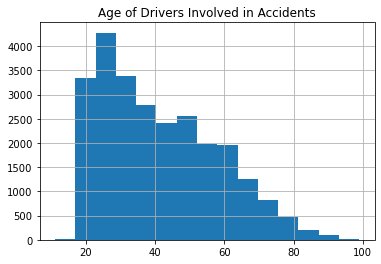

In [17]:
# Drivers involved in accidents grouped by age 
ax=df1.Age.hist(bins=15)
ax.set_title("Age of Drivers Involved in Accidents")

In [18]:
# Alcohol test positive
df1a=df1.loc[df1['Alcohol Test Results'].notna()]
df1a['Alcohol Test Results']=df1a['Alcohol Test Results'].astype(float)
df1a=df1a[~(df1a['Alcohol Test Results']==0)]

<ipython-input-18-108ad1e1bd2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1a['Alcohol Test Results']=df1a['Alcohol Test Results'].astype(float)


In [19]:
df1a.dtypes

Number                          object
Vehicle Number                  object
Driver City                     object
Driver State                    object
Driver Zip Code                 object
Driver License State            object
Driver DOB              datetime64[ns]
Driver Sex                      object
Alcohol Test Results           float64
Charge 1                        object
Summons 1                       object
Charge 2                        object
Summons 2                       object
Charge 3                        object
Summons 3                       object
Charge 4                        object
Summons 4                       object
Age                              int64
dtype: object

In [20]:
df1a

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,0.20,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26
75,201704032017-002002,1,SOMERDALE,NJ,08083,NJ,1987-12-31,M,0.09,39:4-50,E16000468,39:4-51B,E16000469,NaN,NaN,NaN,NaN,30
529,201704042017003845,1,HAMMONTON,NJ,08037,NJ,1967-10-10,F,0.15,39:4-50,0404B038054,39:3-10,0404E17002611,39:3-40,0404E17002612,39:4-130,0404E17002613,50
669,201704042017009042,1,RUNNEMEDE,NJ,08078,NJ,1965-07-06,M,0.18,39:4-50,0404B037267,39:4-96,0404E17005991,39:3-10A,0404E17005992,39:3-40,0404E005993,52
713,201704042017009923,2,MAGNOLIA,NJ,08049,NJ,1998-11-12,M,0.12,39:4-50,0404B038159,39:4-98,0404E17006426,39:4-129B,0404E17006427,39:4-130,0404E17006428,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29050,20170436170040289,1,BLACKWOOD,NJ,08012,NJ,1995-09-07,M,0.15,39:4-50,C102198,39:6B-2,C102200,39:4-97,C102199,NaN,NaN,22
29344,20170436170048299,1,SICKLERVILLE,NJ,08081,NJ,1970-07-30,M,0.15,39:4-50,103526,39:4-96,103527,39:4-129B,103528,39:4-130,103529,47
29609,20170436A160-2017-00187A,1,HUNTINGDON VLY,PA,19006,PA,1990-02-20,M,0.02,39 4 50,SP5624692,39 4 96,SP5624693,39 4 88B,SP5624694,39 4 64,SP5624695,27
29637,20170436A160-2017-00329A,1,PENNSAUKEN,NJ,08110,NJ,1995-09-17,M,0.01,39 4 50,0436E17000782,39 4 51B,0436E17000783,39 4 96,0436E17000784,39 4 88B,0436E17000785,22


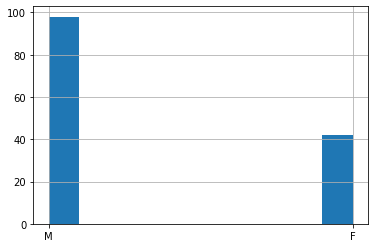

In [21]:
# Numbers of males and females who failed to pass the alcohol tests
df1a['Driver Sex'].hist()

In [22]:
df1a['Driver Sex'].value_counts()

M    98
F    42
Name: Driver Sex, dtype: int64

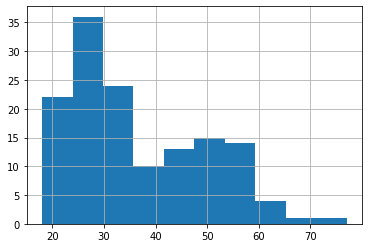

In [23]:
# Number of people who failed to pass the alcohol test grouped by age
df1a['Age'].hist()

In [24]:
df1a['Driver City'].value_counts()

CAMDEN                       11
CHERRY HILL                   9
SICKLERVILLE                  7
PHILADELPHIA                  7
PENNSAUKEN                    7
                             ..
HI-NELLA                      1
BRISTOL                       1
MULLICA HILL                  1
FAYETTEVILLE                  1
FLORENCE                      1
Name: Driver City, Length: 69, dtype: int64

In [25]:
df1b=df1.loc[df1['Charge 1'].notna()|df1['Charge 2'].notna()|df1['Charge 3'].notna()]

In [26]:
df1b['Driver Sex'].value_counts()

M    3536
F    2210
Name: Driver Sex, dtype: int64

Text(0.5, 1.0, 'Age of Drivers Who Got Charged in Accidents')

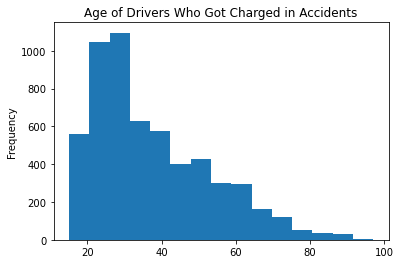

In [27]:
# The age distrubtion of people who got charges (Year of 2017)
ax=df1b.Age.plot.hist(bins=15)
ax.set_title("Age of Drivers Who Got Charged in Accidents")

In [28]:
df1b['Driver City'].value_counts()

CAMDEN                       577
CHERRY HILL                  363
SICKLERVILLE                 326
PHILADELPHIA                 277
PENNSAUKEN                   214
                            ... 
TULLYTOWN                      1
LIDENWOLD                      1
JB MDL                         1
SUSQUEHANNA                    1
DRESHER                        1
Name: Driver City, Length: 698, dtype: int64

In [29]:
df1b['Driver State'].value_counts()

NJ    5023
PA     480
NY      38
DE      37
FL      35
MD      31
NC      17
VA      14
GA      12
OH       6
CA       5
WA       5
CT       4
MA       3
KS       3
MI       3
NV       3
TX       3
SC       3
MS       2
IL       2
MN       2
LA       2
AL       2
ME       1
NE       1
VT       1
WY       1
WV       1
CO       1
AZ       1
WI       1
IA       1
TN       1
AR       1
Name: Driver State, dtype: int64

In [30]:
df1b.dtypes

Number                          object
Vehicle Number                  object
Driver City                     object
Driver State                    object
Driver Zip Code                 object
Driver License State            object
Driver DOB              datetime64[ns]
Driver Sex                      object
Alcohol Test Results            object
Charge 1                        object
Summons 1                       object
Charge 2                        object
Summons 2                       object
Charge 3                        object
Summons 3                       object
Charge 4                        object
Summons 4                       object
Age                              int64
dtype: object

In [31]:
df1b['Vehicle Number']=df1b['Vehicle Number'].astype(int)

<ipython-input-31-a7a13acbb18d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1b['Vehicle Number']=df1b['Vehicle Number'].astype(int)


In [32]:
# Check which vehicle owner got charged, number 1 or 2?
df1b.loc[df1b['Vehicle Number']==2]

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,1980-11-26,F,NaN,NaN,NaN,39:6B-2 UNINSURED VEHICLE,HT161034,NaN,NaN,NaN,NaN,37
125,201704032017-003854,2,SEWELL,NJ,08080,NJ,1996-06-10,F,NaN,39:4-97,E17001159,39:4-81,E17001160,NaN,NaN,NaN,NaN,21
137,201704032017-004055,2,GLENDORA,NJ,08029,NJ,1971-10-24,M,NaN,3-40,E17001207,4-130,E17001208,4-129A,E17001209,3-29A,E17001210,46
150,201704032017-004651,2,MOORESTOWN,NJ,08057,NJ,1991-09-03,M,NaN,39:4-130,1376,39:4-97A,1378,39:4-129D,1377,39:3-4,1380,26
166,201704032017-005889,2,ATCO,NJ,08004,NJ,1995-04-07,M,NaN,39:3-29B,E17001799,NaN,NaN,NaN,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29786,2017043701521-17,2,CAMDEN,NJ,08104,NJ,1986-09-26,M,NaN,39:3-76.2F,W011609,39:4-97,W011608,NaN,NaN,NaN,NaN,31
29790,2017043701631-17,2,KEARNY,NJ,07032,NJ,1995-10-31,M,NaN,39:4-97,W011666,39:4-123A,W011667,NaN,NaN,NaN,NaN,22
29798,2017043717-00364,2,CHESTER,PA,19013,PA,1989-12-01,M,NaN,NaN,NaN,39:3-10,0437 W 011219,NaN,NaN,NaN,NaN,28
29802,2017043717-00548,2,CAMDEN,NJ,08104,NJ,1993-06-19,M,NaN,NaN,NaN,NaN,NaN,MULTIPLE,W011291,NaN,NaN,24


In [33]:
df1b.loc[df1b['Vehicle Number']==1]

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,1961-06-03,F,NaN,IMPROPER BACKING,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604,56
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,.2,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,1943-12-15,M,NaN,39:4-97 CARELESS DRIVING,HT159649,NaN,NaN,39:4-97.3 CELL PHONE USE,HT159650,NaN,NaN,74
6,2017040217-194-A,1,OAKLYN,NJ,08107,NJ,1999-08-12,M,NaN,39:4-97,HT162588,NaN,NaN,NaN,NaN,NaN,NaN,18
8,2017040217-280-A,1,COLLINGSWOOD,NJ,08108,NJ,1953-06-30,F,NaN,CARELESS DRIVING,HT-163369,NaN,NaN,NaN,NaN,NaN,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29775,2017043701044-17,1,FREEMANSBURG,PA,18017,PA,1993-09-14,M,NaN,NONE,NONE,NaN,NaN,NaN,NaN,NaN,NaN,24
29795,2017043717-0029,1,CAMDEN,NJ,08105,NJ,1992-08-09,M,NaN,MULTIPLE,SEE PAGE 2,NaN,NaN,NaN,NaN,NaN,NaN,25
29799,2017043717-00441,1,OAKLYN,NJ,08107,NJ,1976-08-09,F,NaN,MULTIPLE,SEE PG. 2,NaN,NaN,NaN,NaN,NaN,NaN,41
29800,2017043717-00504,1,CAMDEN,NJ,08105,NJ,1998-04-15,F,NaN,MULTIPLE,W011316,NaN,NaN,NaN,NaN,NaN,NaN,19


In [34]:
# Read 2018 data
df2=pd.read_table('Camden_accidents/Camden2018Drivers.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Driver City', 'Driver State', 'Driver Zip Code', 'Driver License State', 'Driver DOB', 'Driver Sex', 'Alcohol Test Given', 
             'Alcohol Test Type', 'Alcohol Test Results', 'Charge 1', 'Summons 1', 'Charge 2', 'Summons 2', 'Charge 3', 'Summons 3', 'Charge 4', 'Summons 4', 'Multi Charge Flag',
              'Driver Physical Status 1', 'Driver Physical Status 2'))

In [35]:
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df2.isnull().sum()

Number                          0
Vehicle Number                  0
Driver City                  3525
Driver State                 3624
Driver Zip Code              3655
Driver License State         3878
Driver DOB                   3654
Driver Sex                   3514
Alcohol Test Given           1375
Alcohol Test Type           30381
Alcohol Test Results        30550
Charge 1                    25261
Summons 1                   25496
Charge 2                    28906
Summons 2                   29070
Charge 3                    29007
Summons 3                   29164
Charge 4                    29975
Summons 4                   30071
Multi Charge Flag           30734
Driver Physical Status 1    30515
Driver Physical Status 2    30734
dtype: int64

In [36]:
df2=df2.drop(columns=['Alcohol Test Given' ,'Alcohol Test Type','Multi Charge Flag', 'Driver Physical Status 1', 'Driver Physical Status 2'])

In [37]:
df2.shape

(30734, 17)

In [38]:
df2['Driver DOB']=pd.to_datetime(df2['Driver DOB'])
df2['Age']=2018-df2['Driver DOB'].dt.year

In [39]:
# Read 2019 Data
df3=pd.read_table('Camden_accidents/Camden2019Drivers.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Driver City', 'Driver State', 'Driver Zip Code', 'Driver License State', 'Driver DOB', 'Driver Sex', 'Alcohol Test Given', 
             'Alcohol Test Type', 'Alcohol Test Results', 'Charge 1', 'Summons 1', 'Charge 2', 'Summons 2', 'Charge 3', 'Summons 3', 'Charge 4', 'Summons 4', 'Multi Charge Flag',
              'Driver Physical Status 1', 'Driver Physical Status 2'))
df3=df3.drop(columns=['Alcohol Test Given' ,'Alcohol Test Type','Multi Charge Flag', 'Driver Physical Status 1', 'Driver Physical Status 2'])
df3.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df3=df3.dropna(subset=['Driver City', 'Driver State', 'Driver Zip Code', 'Driver License State','Driver DOB', 'Driver Sex' ])
df3.shape

(25422, 17)

In [40]:
df3['Driver DOB']=pd.to_datetime(df3['Driver DOB'])
df3['Age']=2019-df3['Driver DOB'].dt.year

In [41]:
df3.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
0,2019040119-519-A,1,HADDON TOWNSHIP,NJ,08033,NJ,2000-11-13,M,NaN,39:3-29 FAILURE TO EXHIBI,HT171740,39:4-97 CARELESS DRIVING,HT172201,39:3-10 UNLICENSED DRIVER,HT172202,NaN,NaN,19
1,2019040119-519-A,2,CAMDEN,NJ,08105,NJ,1987-04-16,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
2,201904012019-007561,1,VINELAND,NJ,08360,NJ,1946-12-31,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
4,201904012019-04554,1,CLEMENTON,NJ,08021,NJ,2001-07-17,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
5,201904012019-04554,2,MT. HOLLY,NJ,08060,NJ,1999-06-08,F,NaN,NaN,NaN,39:4-97,S-099121,NaN,NaN,39:3-10,S-099122,20


In [42]:
# Join 2017, 2018, 2019 data together

Camden_D= pd.concat([df1, df2, df3], join="inner")
Camden_D.shape

(81751, 18)

In [43]:
Camden_D.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,1961-06-03,F,NaN,IMPROPER BACKING,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604,56.0
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,.2,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26.0
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,1980-11-26,F,NaN,NaN,NaN,39:6B-2 UNINSURED VEHICLE,HT161034,NaN,NaN,NaN,NaN,37.0
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,1943-12-15,M,NaN,39:4-97 CARELESS DRIVING,HT159649,NaN,NaN,39:4-97.3 CELL PHONE USE,HT159650,NaN,NaN,74.0
5,2017040217-161-A,2,OAKLYN,NJ,08107,NJ,1954-01-22,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [44]:
# Add Year Column to the table
Camden_D['Year']=Camden_D.Number.str[:4]

In [45]:
Camden_D.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age,Year
0,2017040217-036-A,1,MANTUA,NJ,08051,NJ,1961-06-03,F,NaN,IMPROPER BACKING,HT159601,LEAVING SCENE OF ACCIDENT,HT159603,CARELESS DRIVING,HT159602,FAILURE REPORT ACCIDENT,HT159604,56.0,2017
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,.2,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26.0,2017
3,2017040217-067-A,2,CAMDEN,NJ,08104,NJ,1980-11-26,F,NaN,NaN,NaN,39:6B-2 UNINSURED VEHICLE,HT161034,NaN,NaN,NaN,NaN,37.0,2017
4,2017040217-161-A,1,HADDONFIELD,NJ,08033,NJ,1943-12-15,M,NaN,39:4-97 CARELESS DRIVING,HT159649,NaN,NaN,39:4-97.3 CELL PHONE USE,HT159650,NaN,NaN,74.0,2017
5,2017040217-161-A,2,OAKLYN,NJ,08107,NJ,1954-01-22,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,2017


In [46]:
Camden_Da=Camden_D.loc[Camden_D['Alcohol Test Results'].notna()]
Camden_Da['Alcohol Test Results']=Camden_Da['Alcohol Test Results'].astype(float)
Camden_Da=Camden_Da[~(Camden_Da['Alcohol Test Results']==0)]
Camden_Db=Camden_D.loc[Camden_D['Charge 1'].notna()|Camden_D['Charge 2'].notna()|Camden_D['Charge 3'].notna()]

<ipython-input-46-5a33f7d6a765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Camden_Da['Alcohol Test Results']=Camden_Da['Alcohol Test Results'].astype(float)


In [47]:
Camden_Da.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Zip Code,Driver License State,Driver DOB,Driver Sex,Alcohol Test Results,Charge 1,Summons 1,Charge 2,Summons 2,Charge 3,Summons 3,Charge 4,Summons 4,Age,Year
2,2017040217-067-A,1,MALVERN,PA,19355,PA,1991-05-19,M,0.20,39:4-50 D.W.I.,HT161024,NaN,NaN,39:4-129 LEAVING SCENE,HT161026,NaN,NaN,26.0,2017
75,201704032017-002002,1,SOMERDALE,NJ,08083,NJ,1987-12-31,M,0.09,39:4-50,E16000468,39:4-51B,E16000469,NaN,NaN,NaN,NaN,30.0,2017
529,201704042017003845,1,HAMMONTON,NJ,08037,NJ,1967-10-10,F,0.15,39:4-50,0404B038054,39:3-10,0404E17002611,39:3-40,0404E17002612,39:4-130,0404E17002613,50.0,2017
669,201704042017009042,1,RUNNEMEDE,NJ,08078,NJ,1965-07-06,M,0.18,39:4-50,0404B037267,39:4-96,0404E17005991,39:3-10A,0404E17005992,39:3-40,0404E005993,52.0,2017
713,201704042017009923,2,MAGNOLIA,NJ,08049,NJ,1998-11-12,M,0.12,39:4-50,0404B038159,39:4-98,0404E17006426,39:4-129B,0404E17006427,39:4-130,0404E17006428,19.0,2017


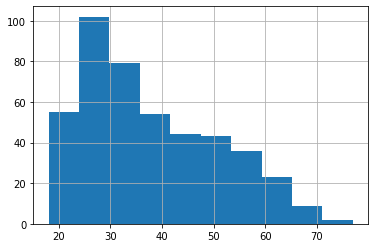

In [48]:
# Drivers tested alcohol positive.
Camden_Da['Age'].hist()

In [49]:
# Drivers alcohol positive by sex
Camden_Da['Driver Sex'].value_counts()

M    315
F    132
Name: Driver Sex, dtype: int64

In [50]:
# Number of alcohol postitive drivers by year
Camden_Da['Year'].value_counts()

2018    157
2019    150
2017    140
Name: Year, dtype: int64

In [51]:
# Numder of charged drivers by year
Camden_Db['Year'].value_counts()

2018    6011
2017    5746
2019    5234
Name: Year, dtype: int64

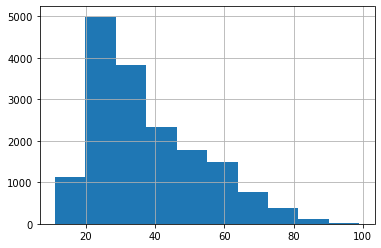

In [52]:
# Number of charged drivers (2017-2019) by age
Camden_Db['Age'].hist()

In [53]:
# Number of charged drivers (2017-2019) by sex
Camden_Db['Driver Sex'].value_counts()

M    10469
F     6377
Name: Driver Sex, dtype: int64

In [54]:
# Number of charged drivers (2017-2019) by city
Camden_Db['Driver City'].value_counts().head(10)

CAMDEN                       1643
SICKLERVILLE                 1027
CHERRY HILL                   998
PHILADELPHIA                  842
PENNSAUKEN                    646
BLACKWOOD                     477
LINDENWOLD                    472
WILLIAMSTOWN                  401
BERLIN                        350
CLEMENTON                     331
Name: Driver City, dtype: int64

In [55]:
Camden_D.shape

(81751, 19)

In [56]:
Camden_D.isnull().sum()

Number                      0
Vehicle Number              0
Driver City              3525
Driver State             3624
Driver Zip Code          3655
Driver License State     3878
Driver DOB               3654
Driver Sex               3514
Alcohol Test Results    81213
Charge 1                66240
Summons 1               66875
Charge 2                76548
Summons 2               76985
Charge 3                76915
Summons 3               77358
Charge 4                79585
Summons 4               79872
Age                      3654
Year                        0
dtype: int64

In [57]:
Camden_D.dropna(subset=['Age','Driver Sex', 'Driver City'], inplace=True)
Camden_D.isnull().sum()

Number                      0
Vehicle Number              0
Driver City                 0
Driver State               46
Driver Zip Code            70
Driver License State      327
Driver DOB                  0
Driver Sex                  0
Alcohol Test Results    77457
Charge 1                62624
Summons 1               63242
Charge 2                72875
Summons 2               73300
Charge 3                73233
Summons 3               73672
Charge 4                75866
Summons 4               76149
Age                         0
Year                        0
dtype: int64

In [58]:
Camden_D.shape

(77995, 19)

In [59]:
Camden_D['Vehicle Number']=Camden_D['Vehicle Number'].astype(int)
Camden_D['Vehicle Number'].value_counts()

1    41763
2    32695
3     2965
4      471
5       76
6       17
7        7
8        1
Name: Vehicle Number, dtype: int64

In [60]:
Camden_D['Driver State'].value_counts().head()

NJ    68436
PA     6245
NY      562
DE      546
MD      452
Name: Driver State, dtype: int64

In [61]:
# Alcohol Test and Charges against drivers can be information leaking features

Camden_D=Camden_D[['Number','Vehicle Number','Driver City', 'Driver State', 'Driver Sex','Age']]

In [62]:
Camden_D.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Sex,Age
0,2017040217-036-A,1,MANTUA,NJ,F,56.0
2,2017040217-067-A,1,MALVERN,PA,M,26.0
3,2017040217-067-A,2,CAMDEN,NJ,F,37.0
4,2017040217-161-A,1,HADDONFIELD,NJ,M,74.0
5,2017040217-161-A,2,OAKLYN,NJ,M,63.0


In [63]:
Camden_D.loc[Camden_D.groupby('Driver City')['Driver City'].transform('count').lt(100), 'Driver City'] = 'Other'
Camden_D['Driver City'].value_counts()

Other                        13231
CAMDEN                        5628
CHERRY HILL                   5579
SICKLERVILLE                  4519
PHILADELPHIA                  3378
                             ...  
NATIONAL PARK                  114
MOUNT EPHRAIM                  107
RIVERSIDE                      106
NEWFIELD                       104
WESTAMPTON                     103
Name: Driver City, Length: 93, dtype: int64

In [64]:
Camden_D1=Camden_D[Camden_D['Vehicle Number']==1]

In [65]:
Camden_D1.head()

,Number,Vehicle Number,Driver City,Driver State,Driver Sex,Age
0,2017040217-036-A,1,MANTUA,NJ,F,56.0
2,2017040217-067-A,1,Other,PA,M,26.0
4,2017040217-161-A,1,HADDONFIELD,NJ,M,74.0
6,2017040217-194-A,1,OAKLYN,NJ,M,18.0
8,2017040217-280-A,1,COLLINGSWOOD,NJ,F,64.0


In [66]:
Camden_D1.shape

(41763, 6)

In [67]:
Camden_D1['Driver City'].value_counts().head(20)

Other                        7189
CAMDEN                       3218
CHERRY HILL                  2919
SICKLERVILLE                 2395
PHILADELPHIA                 1828
PENNSAUKEN                   1745
BLACKWOOD                    1255
VOORHEES                     1151
LINDENWOLD                   1142
WILLIAMSTOWN                  884
CLEMENTON                     870
MARLTON                       781
BERLIN                        755
ATCO                          609
PINE HILL                     588
BELLMAWR                      565
SEWELL                        563
COLLINGSWOOD                  497
SOMERDALE                     491
HADDONFIELD                   437
Name: Driver City, dtype: int64

In [68]:
Camden_D2=Camden_D[Camden_D['Vehicle Number']==2]

In [69]:
Camden_D2.shape

(32695, 6)

In [70]:
Camden_drivers=Camden_D1.merge(Camden_D2, on='Number', how='outer')

In [71]:
Camden_drivers.shape
Camden_drivers.isnull().sum()

Number                  0
Vehicle Number_x     2376
Driver City_x        2376
Driver State_x       2399
Driver Sex_x         2376
Age_x                2376
Vehicle Number_y    11444
Driver City_y       11444
Driver State_y      11464
Driver Sex_y        11444
Age_y               11444
dtype: int64

In [72]:
Camden_drivers.head()

,Number,Vehicle Number_x,Driver City_x,Driver State_x,Driver Sex_x,Age_x,Vehicle Number_y,Driver City_y,Driver State_y,Driver Sex_y,Age_y
0,2017040217-036-A,1.0,MANTUA,NJ,F,56.0,NaN,NaN,NaN,NaN,NaN
1,2017040217-067-A,1.0,Other,PA,M,26.0,2.0,CAMDEN,NJ,F,37.0
2,2017040217-161-A,1.0,HADDONFIELD,NJ,M,74.0,2.0,OAKLYN,NJ,M,63.0
3,2017040217-194-A,1.0,OAKLYN,NJ,M,18.0,2.0,NEWARK,NJ,M,25.0
4,2017040217-280-A,1.0,COLLINGSWOOD,NJ,F,64.0,2.0,PHILADELPHIA,PA,M,28.0


In [73]:
Camden_drivers['Vehicle Number_x'].fillna(1, inplace=True)
Camden_drivers['Vehicle Number_y'].fillna(2, inplace=True)
Camden_drivers ['Driver City_x'].fillna(Camden_drivers ['Driver City_y'], inplace=True)
Camden_drivers ['Driver City_y'].fillna(Camden_drivers ['Driver City_x'], inplace=True)
Camden_drivers ['Age_x'].fillna(Camden_drivers ['Age_y'], inplace=True)
Camden_drivers ['Age_y'].fillna(Camden_drivers ['Age_x'], inplace=True)
Camden_drivers ['Driver Sex_x'].fillna(Camden_drivers ['Driver Sex_y'], inplace=True)
Camden_drivers ['Driver Sex_y'].fillna(Camden_drivers ['Driver Sex_x'], inplace=True)
Camden_drivers.drop(columns=['Driver State_x', 'Driver State_y'], inplace=True)

In [74]:
Camden_drivers.head()

,Number,Vehicle Number_x,Driver City_x,Driver Sex_x,Age_x,Vehicle Number_y,Driver City_y,Driver Sex_y,Age_y
0,2017040217-036-A,1.0,MANTUA,F,56.0,2.0,MANTUA,F,56.0
1,2017040217-067-A,1.0,Other,M,26.0,2.0,CAMDEN,F,37.0
2,2017040217-161-A,1.0,HADDONFIELD,M,74.0,2.0,OAKLYN,M,63.0
3,2017040217-194-A,1.0,OAKLYN,M,18.0,2.0,NEWARK,M,25.0
4,2017040217-280-A,1.0,COLLINGSWOOD,F,64.0,2.0,PHILADELPHIA,M,28.0


In [75]:
df6=pd.read_csv('Camden_accidents/Camden.csv')
df7=df6.merge(Camden_drivers, on='Number')

In [76]:
df7.drop(columns=['Datetime', 'Number','Vehicle Number_x', 'Vehicle Number_y'], inplace=True)

In [77]:
df7.shape

(43988, 7)

In [78]:
df7.Age_x.value_counts()

24.0    1317
26.0    1282
25.0    1277
23.0    1253
20.0    1236
        ... 
11.0       2
8.0        1
14.0       1
12.0       1
9.0        1
Name: Age_x, Length: 91, dtype: int64

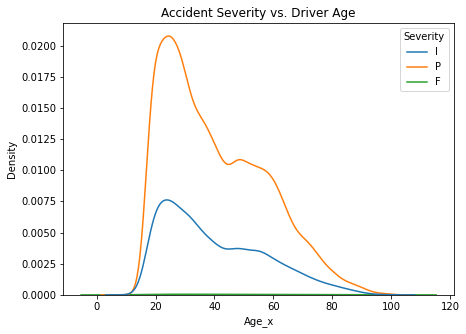

In [79]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Accident Severity vs. Driver Age')
sns.kdeplot(ax=ax, x='Age_x', hue='Severity', data =df7);

Text(0.5, 1.0, 'Accident Severity vs. Driver_1 Sex')

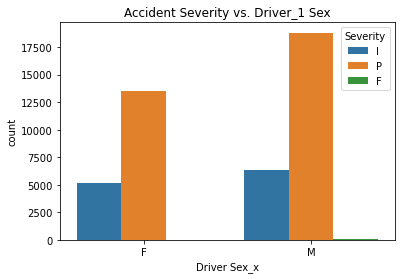

In [80]:
ax=sns.countplot(x='Driver Sex_x', hue='Severity', data =df7);
ax.set_title('Accident Severity vs. Driver_1 Sex')

In [81]:
print(df7.Severity[df7['Driver Sex_x']=='F'].value_counts())
print(df7.Severity[df7['Driver Sex_x']=='M'].value_counts())

P    13501
I     5185
F       29
Name: Severity, dtype: int64
P    18809
I     6361
F      103
Name: Severity, dtype: int64


In [82]:
df7.Severity[df7.Severity=='P']=0
df7.Severity[df7.Severity!=0]=1
df7.Severity.value_counts()

<ipython-input-82-797d219e2c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.Severity[df7.Severity=='P']=0
<ipython-input-82-797d219e2c6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.Severity[df7.Severity!=0]=1


0    32310
1    11678
Name: Severity, dtype: int64

In [83]:
df7.phik_matrix()

interval columns not set, guessing: ['Age_x', 'Age_y']


,Severity,Driver City_x,Driver Sex_x,Age_x,Driver City_y,Driver Sex_y,Age_y
Severity,1.000000,0.106954,0.039359,0.023005,0.121628,0.058716,0.016078
Driver City_x,0.106954,1.000000,0.114510,0.193453,0.977052,0.075796,0.121154
Driver Sex_x,0.039359,0.114510,1.000000,0.065099,0.067131,0.482868,0.024749
Age_x,0.023005,0.193453,0.065099,1.000000,0.123190,0.040020,0.764728
Driver City_y,0.121628,0.977052,0.067131,0.123190,1.000000,0.136266,0.185136
Driver Sex_y,0.058716,0.075796,0.482868,0.040020,0.136266,1.000000,0.055693
Age_y,0.016078,0.121154,0.024749,0.764728,0.185136,0.055693,1.000000


interval columns not set, guessing: ['Age_x', 'Age_y']


Text(0.5, 1.0, 'Correlation of the Drivers Features')

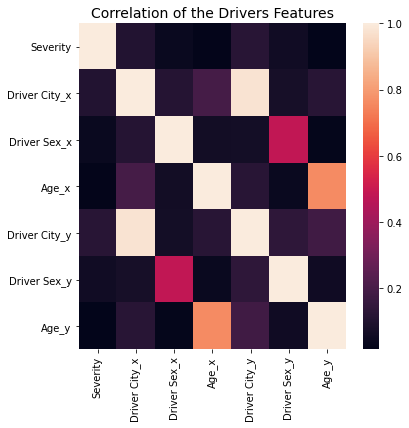

In [90]:
plt.figure(figsize=(6,6))
ax=sns.heatmap(df7.phik_matrix())
ax.set_title('Correlation of the Drivers Features', fontsize=14)

interval columns not set, guessing: ['Age_x', 'Age_y']


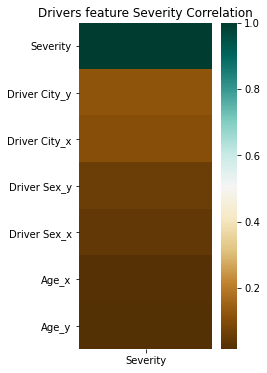

In [91]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df7.phik_matrix()[['Severity']].sort_values(by='Severity', ascending=False),cmap='BrBG')
heatmap.set_title('Drivers feature Severity Correlation');

In [85]:
Camden_drivers.to_csv('Camden_accidents/Camden_drivers.csv')